In [120]:
# Data Handling
import pandas as pd
import numpy as np
import math

# Regression Analysis
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

# Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

# Surpress IPython warnings
import warnings
warnings.filterwarnings("ignore")

#### Research Question

### What is the change in mental health over the two year period between 2018 and 2020?

<!-- ### Implicit Hypothesis 1 (expectation): There is a increase in mental health from 2018 to 2019 -->

#### $H_{10}$: There is no significant change in mental health from 2018 to 2019
#### $H_{1A}$:: There is a significant change in mental health from 2018 to 2019

<!-- ### Implicit hypothesis 2 (expectation): There is an decrease in mental health from 2019 to 2020 --> 

#### $H_{20}$:: There is no significant change in mental health from 2019 to 2020
#### $H_{2A}$: There is a significant change in mental health from 2019 to 2020


Since we only concern on the self-rated mental health,
We can remove all the other entries. 

After some spreadcheet cleaning, we now get the following data sheet

In [121]:
data_directory = 'Data'

## Self-rated mental health dataset

In [122]:
# Load listings data set
df1 = pd.read_csv(f"{data_directory}/mentalHealth.csv", sep=',', quotechar='"')
df1

,Year,Region,Category,Topic,Indicator,Age,Sex,Result,Unit,95% CI (L),95% CI (U),SE,RSE > 25%,Notes,Sex_indicator,Year_Sex,Sex_Year
0,2018,ACT,Mental health,Self-rated mental health,1. Excellent/very good,05 to 17,Person,72.7,Per cent,65.3,79.1,3.5,NaN,NaN,Person _ 1. Excellent/very good,2018 Person,Person 2018
1,2020,ACT,Mental health,Self-rated mental health,1. Excellent/very good,05 to 17,Person,71.4,Per cent,67.7,74.9,1.8,NaN,NaN,Person _ 1. Excellent/very good,2020 Person,Person 2020
2,2018,ACT,Mental health,Self-rated mental health,2. Good,05 to 17,Person,21.1,Per cent,15.2,28.6,3.4,NaN,NaN,Person _ 2. Good,2018 Person,Person 2018
3,2020,ACT,Mental health,Self-rated mental health,2. Good,05 to 17,Person,20.8,Per cent,17.8,24.2,1.6,NaN,NaN,Person _ 2. Good,2020 Person,Person 2020
4,2018,ACT,Mental health,Self-rated mental health,3. Fair/poor,05 to 17,Person,6.2,Per cent,3.7,10.1,1.6,25.6,NaN,Person _ 3. Fair/poor,2018 Person,Person 2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,2019,ACT,Mental health,Self-rated mental health,2. Good,65+,Person,23.5,Per cent,19.6,27.9,2.1,NaN,NaN,65+ _ 2. Good,2019 Person,Person 2019
77,2020,ACT,Mental health,Self-rated mental health,2. Good,65+,Person,17.4,Per cent,11.5,25.3,3.5,NaN,NaN,65+ _ 2. Good,2020 Person,Person 2020
78,2018,ACT,Mental health,Self-rated mental health,3. Fair/poor,65+,Person,8.5,Per cent,5.6,12.9,1.8,NaN,NaN,65+ _ 3. Fair/poor,2018 Person,Person 2018
79,2019,ACT,Mental health,Self-rated mental health,3. Fair/poor,65+,Person,12.0,Per cent,8.8,16.0,1.8,NaN,NaN,65+ _ 3. Fair/poor,2019 Person,Person 2019


### Missing values 
Is there anything missing in the self-rated mental health dataframe

In [123]:
df1.isna().sum()

Year              0
Region            0
Category          0
Topic             0
Indicator         0
Age               0
Sex               0
Result            0
Unit              0
95% CI (L)        0
95% CI (U)        0
SE                0
RSE > 25%        77
Notes            81
Sex_indicator     0
Year_Sex          0
Sex_Year          0
dtype: int64

### How do these counts look in the bigger picture. We certainty can visualize the ratio:

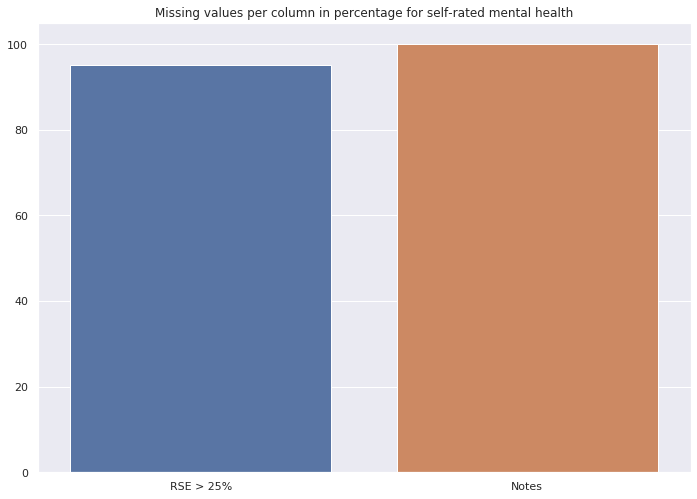

In [124]:
# Change figure size for printing
sns.set(rc={'figure.figsize':(11.7,8.27)})

# Calculate percentage of missing values for each column
df_miss_perc = df1.isna().mean() * 100

# Drop columns without missing values
miss_perc = df_miss_perc[df_miss_perc > 0]

if len(miss_perc) == 0:
    raise Exception('no missing values!')

ax = sns.barplot(x=miss_perc.index, y=miss_perc.values)
foo = ax.set_title("Missing values per column in percentage for self-rated mental health")

#### There are 2 columns affected by missing values in our listing data set. Since we do not use `RSE > 25%` and `Notes` such that we do nothing.

#### We can now delete the irrelevant columns such as `Sex_indicator`, `Year_Sex`, and `Sex_Year`. 

In [125]:
df1 = df1.drop(columns=['Sex_indicator', 'Year_Sex', 'Sex_Year'])

## Categorise the self-rated mental health data set

#### The data set is categorised in the following format 

In [126]:
df11 = df1.groupby(['Topic', 'Year', 'Age', 'Indicator', 'Sex']).mean().reset_index()

In [127]:
df1count= df1.groupby(['Topic', 'Year', 'Sex'])['Region'].count()
df1count

Topic                     Year  Sex   
Self-rated mental health  2018  Female     6
                                Male       6
                                Person    18
                          2019  Female     3
                                Male       3
                                Person    15
                          2020  Female     6
                                Male       6
                                Person    18
Name: Region, dtype: int64

### Since the Person column is the total estimate of all the sexes such that we can ignore the effects of sex for our analysis of self-rated mental health

In [128]:
df_Persons1 = df11.loc[df11['Sex'].isin(['Person'])].reset_index().drop(columns=['index', 'Sex', 'RSE > 25%','Notes'])
df_Persons1

,Topic,Year,Age,Indicator,Result,95% CI (L),95% CI (U),SE
0,Self-rated mental health,2018,05 to 17,1. Excellent/very good,72.7,65.3,79.1,3.5
1,Self-rated mental health,2018,05 to 17,2. Good,21.1,15.2,28.6,3.4
2,Self-rated mental health,2018,05 to 17,3. Fair/poor,6.2,3.7,10.1,1.6
3,Self-rated mental health,2018,18 to 24,1. Excellent/very good,39.2,26.8,53.2,6.8
4,Self-rated mental health,2018,18 to 24,2. Good,32.0,20.6,46.1,6.6
5,Self-rated mental health,2018,18 to 24,3. Fair/poor,28.8,17.9,42.9,6.4
6,Self-rated mental health,2018,18+,1. Excellent/very good,56.0,52.5,59.5,1.8
7,Self-rated mental health,2018,18+,2. Good,27.2,24.2,30.5,1.6
8,Self-rated mental health,2018,18+,3. Fair/poor,16.8,14.2,19.7,1.4
9,Self-rated mental health,2018,25 to 44,1. Excellent/very good,55.2,49.7,60.5,2.8


In [129]:
df_Persons1.count()[0]

51

### Let's now normalise the mental health results by putting weightings on each mental health categories 

#### 1. Excellent / very good : Score 1
#### 2. Good : Score 0
#### 2. Fair/ poor: Score -1


In [130]:
def quantifyScore(DataFrame, ColumnName='Indicator', lst=[1, 0, -1]):
    """
    Normalise the mental health categorised results by assigning scores according to the list
    [Category1_score, Category2_score, Category3_score]
    """
    
    def zerolistmaker(n):
        listofzeros = [0] * n
        return listofzeros
    
    def calScores(DataFrame, ColumnName, lst):
        """
        Calculate the scores of the respective sections:
        Result, 95% CI (L), 95% CI (U), SE
        """
        def factor(category):
            """Return a factor value based on the category"""
            factor = 0
            if (category == "1. Excellent/very good"):
                factor = lst[0]
            elif (category == "2. Good"):
                factor = lst[1]
            elif (category == "3. Fair/poor"):
                factor = lst[2]
            else:
                raise Exception(f"{category} is an invalid category")
            return factor
        
        
        n = DataFrame.count()[0]
        #print(n)
        empty = zerolistmaker(n)
        tmp = DataFrame.assign(LCI95Scores=empty)
        DataFrame = tmp.assign(ResultScores=empty)
        tmp = DataFrame.assign(UCI95Scores=empty)
        DataFrame = tmp.assign(SEScores=empty)
    
        for i in range(n):
            category = DataFrame[ColumnName][i]
            lower = DataFrame["95% CI (L)"][i]
            middle = DataFrame["Result"][i]
            upper = DataFrame["95% CI (U)"][i]
            SE = DataFrame["SE"][i]
            factval = factor(category)
        
            DataFrame["LCI95Scores"][i] = factval * lower
            DataFrame["ResultScores"][i] = factval * middle
            DataFrame["UCI95Scores"][i] = factval * upper
            DataFrame["SEScores"][i] = factval * SE
            
        return DataFrame
        
    def combine(tmp, lst):
        
        def assign(tmp, lst, idx, vallst):
            """
            Assign a value of val to the idx index of the tmp[lst(iter)] variable
            """
            n = len(lst)
            for i in range(n):
                tmp[lst[i]][idx] = vallst[i]
            return tmp
        
        n = tmp.count()[0]
        total = []
        m = len(lst)
        for i in lst:
            total.append(tmp[i][0])
        #print(total)
        
        cnt = 0
        for i in range(1, n):
            lower = tmp["LCI95Scores"][i]
            middle = tmp["ResultScores"][i]
            upper = tmp["UCI95Scores"][i]
            SE = tmp["SEScores"][i]   
        
            if (tmp["Age"][i] == tmp["Age"][i-1]):
                total[0] += lower
                total[1] += middle
                total[2] += upper
                total[3] += SE
                tmp = assign(tmp, lst, i, zerolistmaker(len(lst)))
                cnt += 1
                
            else: 
                tmp = assign(tmp, lst, i-1, [total[0], total[1], total[2], total[3]])
                tmp = assign(tmp, lst, i-cnt-1, zerolistmaker(len(lst)))
                cnt = 0
                
        return tmp
    
    def rearrange(tmp, lst):
        """
        Reorder the lst = [Category 1, Category 2]
        where Category 1 = 95% CI (L), Category 2 = 95% CI (U)
        """
        
        n = tmp.count()[0]
        l = lst[0]
        u = lst[1]
        for i in range(n):
            lower = tmp[l][i]
            upper = tmp[u][i]
            if (lower > upper):
                tmp[l][i] = upper
                tmp[u][i] = lower
        
        return tmp
    
    
    
    tmp = calScores(DataFrame, ColumnName, lst)
    DataFrame = combine(tmp,["LCI95Scores", "ResultScores", "UCI95Scores", "SEScores"])
    tmp = rearrange(DataFrame, ["LCI95Scores","UCI95Scores"])
    
    # Drop all the zeros and reset the indexing
    DataFrame = tmp.drop(tmp[(tmp == 0).any(axis=1)].index)
    tmp = DataFrame.reset_index().drop(columns=["index"])
    
    return tmp
    

In [131]:
df_score = quantifyScore(df_Persons1).drop(columns=["Indicator", "Result", "95% CI (L)", "95% CI (U)", "SE"])
df_score

,Topic,Year,Age,LCI95Scores,ResultScores,UCI95Scores,SEScores
0,Self-rated mental health,2018,05 to 17,61.6,66.5,69.0,1.9
1,Self-rated mental health,2018,18 to 24,26.1,37.7,43.7,-4.5
2,Self-rated mental health,2018,18+,6.4,20.9,29.5,-5.9
3,Self-rated mental health,2018,25 to 44,-15.2,3.9,16.2,-8.0
4,Self-rated mental health,2018,45 to 64,-34.8,-11.4,4.4,-10.0
5,Self-rated mental health,2018,65+,-47.7,-19.9,-1.2,-11.8
6,Self-rated mental health,2019,18 to 24,-81.6,-41.8,-14.5,-17.0
7,Self-rated mental health,2019,18+,-101.1,-58.8,-29.3,-18.2
8,Self-rated mental health,2019,25 to 44,-124.1,-77.4,-44.3,-20.2
9,Self-rated mental health,2019,45 to 64,-143.0,-93.0,-57.1,-21.8


#### Split the dataframe according to the different year periods of 2018, 2019, and 2020

In [132]:
dfScore2018 = df_score[:6]
dfScore2019 = df_score[6:11].reset_index().drop(columns=["index"])
dfScore2020 = df_score[11:].reset_index().drop(columns=["index"])

### We now have normalize the self-rated mental health results into scores such that we can now do a regression analysis for both independent variables `Age` and `Year`

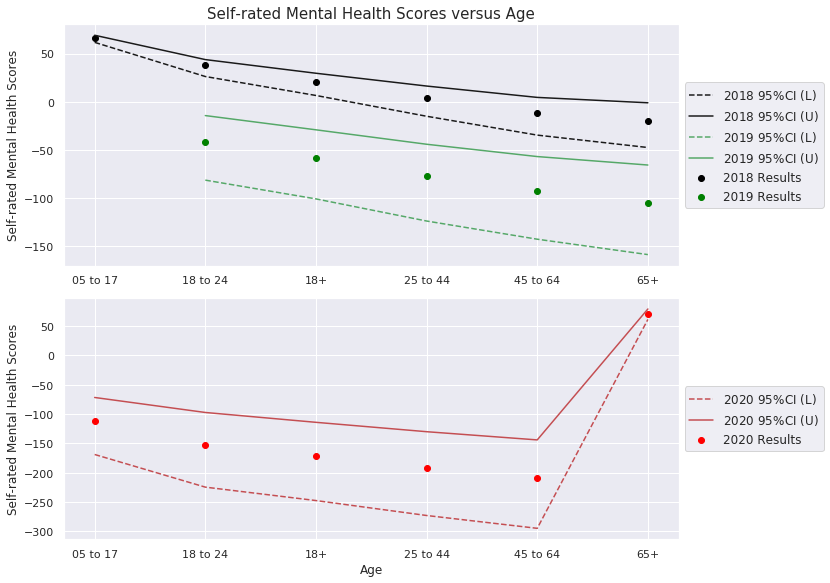

In [133]:
fig, (ax1, ax2) = plt.subplots(2, 1)

ax1.plot(dfScore2018["Age"], dfScore2018["LCI95Scores"], "k--", label='2018 $95 \% $CI (L)')
ax1.scatter(dfScore2018["Age"], dfScore2018["ResultScores"], c="black",label='2018 Results')
ax1.plot(dfScore2018["Age"], dfScore2018["UCI95Scores"], "k-", label='2018 $95 \% $CI (U)')

ax1.plot(dfScore2019["Age"], dfScore2019["LCI95Scores"], "g--", label='2019 $95 \% $CI (L)')
ax1.scatter(dfScore2019["Age"], dfScore2019["ResultScores"], c="green", label='2019 Results')
ax1.plot(dfScore2019["Age"], dfScore2019["UCI95Scores"], "g-", label='2019 $95 \% $CI (U)')

ax2.plot(dfScore2020["Age"], dfScore2020["LCI95Scores"], "r--",label='2020 $95 \% $CI (L)')
ax2.scatter(dfScore2020["Age"], dfScore2020["ResultScores"], c="red", label='2020 Results')
ax2.plot(dfScore2020["Age"], dfScore2020["UCI95Scores"], "r-",label='2020 $95 \% $CI (U)')
            

ax1.set(ylabel='Self-rated Mental Health Scores')
ax2.set(xlabel='Age', ylabel='Self-rated Mental Health Scores')

ax1.legend(loc='center left',fontsize=12, bbox_to_anchor=(1, 0.5), fancybox=True)
ax2.legend(loc='center left',fontsize=12, bbox_to_anchor=(1, 0.5), fancybox=True)

ax1.grid(True)
ax2.grid(True)

ax1.set_title('Self-rated Mental Health Scores versus Age', fontsize=15)
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()
print('')

# Regression Analysis

### 2018 

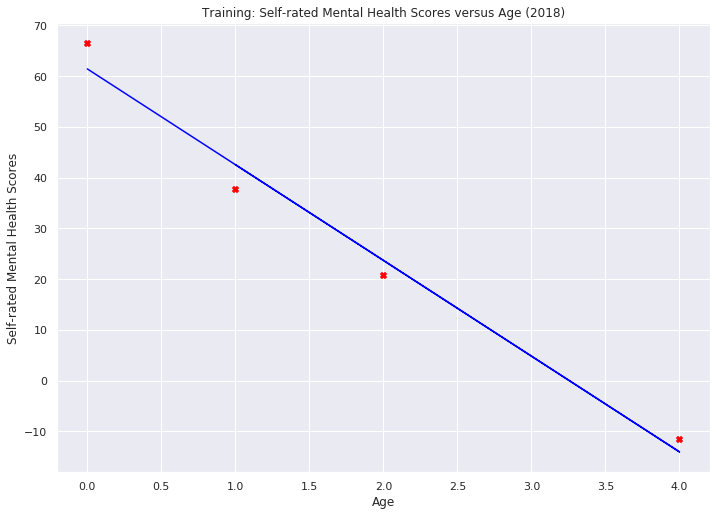

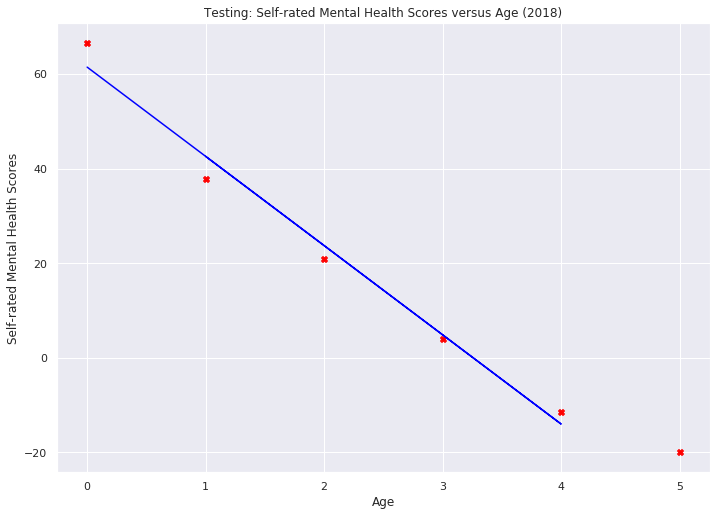

Coefficient :  [-18.86571429]
Intercept :  61.44
Mean Squared Error (MSE)  :   16.032428571428554


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.980
Model:                            OLS   Adj. R-squared:                  0.970
Method:                 Least Squares   F-statistic:                     97.12
Date:                Sat, 08 Apr 2023   Prob (F-statistic):             0.0101
Time:                        16:44:11   Log-Likelihood:                -11.225
No. Observations:                   4   AIC:                             26.45
Df Residuals:                       2   BIC:                             25.22
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         61.4400      4.386     14.008      0.005      42.568      80.312
x1           -18.8657      1.914     -9.855      0.010     -27.102     -10.629
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   2.302
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.486
Skew:                           0.038   Prob(JB):                        0.784
Kurtosis:                       1.293   Cond. No.                         3.97
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [103]:
# 2018
x_train = np.array([0, 2, 4, 1]).reshape((-1, 1))
y_train = np.array([dfScore2018["ResultScores"][0], 
                   dfScore2018["ResultScores"][2], 
                   dfScore2018["ResultScores"][4], 
                   dfScore2018["ResultScores"][1]])

x_test = np.array([0, 1, 2, 3, 4, 5]).reshape((-1, 1))
y_test = np.array(dfScore2018["ResultScores"])

lr = LinearRegression()
lr.fit(x_train, y_train)

# Predicting Y from linear regression model
y_pred = lr.predict(x_train)

# Plotting graph (Training)
plt.scatter(x_train, y_train, color="red", marker="X")
plt.plot(x_train, y_pred, color="blue")
plt.title("Training: Self-rated Mental Health Scores versus Age (2018)")
plt.xlabel("Age")
plt.ylabel("Self-rated Mental Health Scores")
plt.show()

# Plotting graph (Testing)
plt.scatter(x_test, y_test, color="red", marker="X")
plt.plot(x_train, y_pred, color="blue")
plt.title("Testing: Self-rated Mental Health Scores versus Age (2018)")
plt.xlabel("Age")
plt.ylabel("Self-rated Mental Health Scores")
plt.show()


# Assigning Coefficient (gradient) to b
b = lr.coef_
print("Coefficient : ", b)

# Assigning y-intercept to a
a = lr.intercept_
print("Intercept : ", a)

# Mean Squared Error (MSE)
from sklearn import metrics
print('Mean Squared Error (MSE)  :  ', metrics.mean_squared_error(y_train, y_pred))

import statsmodels.api as sm
# Ordinary Least-Squares (OLS) estimator is called 
# to get regression summary
x_stat = sm.add_constant(x_train)
regsummary = sm.OLS(y_train, x_stat).fit()
regsummary.summary()
# print("Adjusted R-Square : ", regsummary.rsquared_adj)
# print("R-Square : ", regsummary.rsquared)

## 2019

In [134]:
# dfScore2019["ResultScores"]

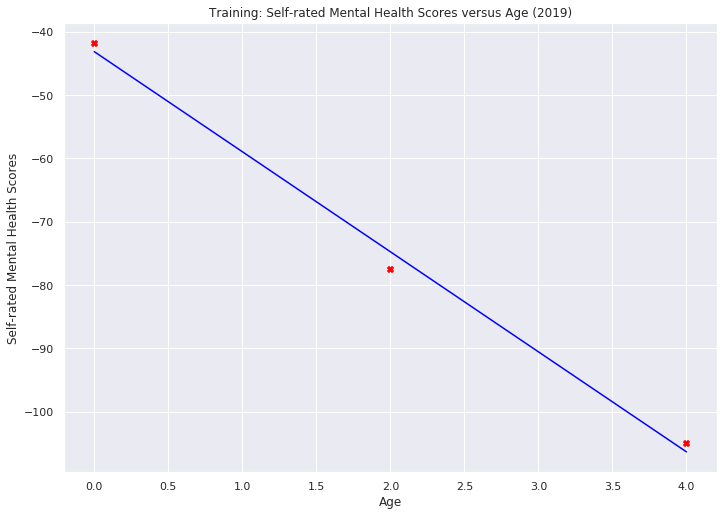

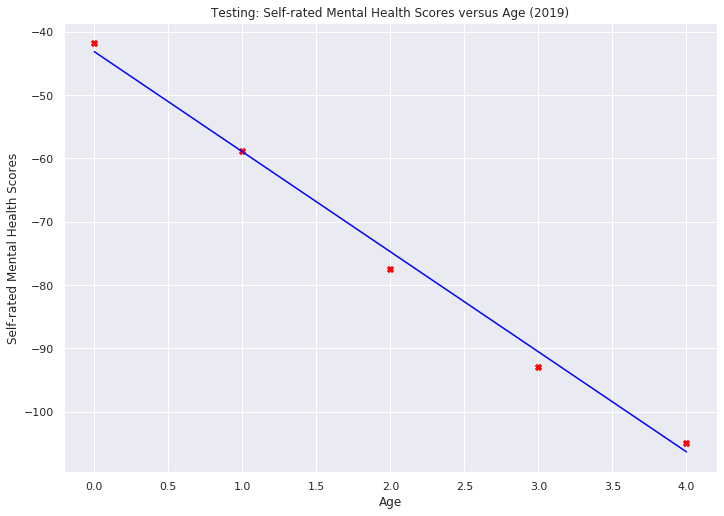

Coefficient :  [-15.8]
Intercept :  -43.133333333333354
Mean Squared Error (MSE)  :   3.5555555555555682


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                     187.2
Date:                Sat, 08 Apr 2023   Prob (F-statistic):             0.0464
Time:                        17:04:33   Log-Likelihood:                -6.1596
No. Observations:                   3   AIC:                             16.32
Df Residuals:                       1   BIC:                             14.52
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -43.1333      2.981    -14.467      0.044     -81.016      -5.251
x1           -15.8000      1.155    -13.683      0.046     -30.472      -1.128
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   3.000
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.531
Skew:                          -0.707   Prob(JB):                        0.767
Kurtosis:                       1.500   Cond. No.                         4.47
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [135]:
# 2019
x_train = np.array([0, 2, 4]).reshape((-1, 1))
y_train = np.array([dfScore2019["ResultScores"][0], 
                   dfScore2019["ResultScores"][2], 
                   dfScore2019["ResultScores"][4]])

x_test = np.array([0, 1, 2, 3, 4]).reshape((-1, 1))
y_test = np.array(dfScore2019["ResultScores"])

lr = LinearRegression()
lr.fit(x_train, y_train)

# Predicting Y from linear regression model
y_pred = lr.predict(x_train)

# Plotting graph (Training)
plt.scatter(x_train, y_train, color="red", marker="X")
plt.plot(x_train, y_pred, color="blue")
plt.title("Training: Self-rated Mental Health Scores versus Age (2019)")
plt.xlabel("Age")
plt.ylabel("Self-rated Mental Health Scores")
plt.show()

# Plotting graph (Testing)
plt.scatter(x_test, y_test, color="red", marker="X")
plt.plot(x_train, y_pred, color="blue")
plt.title("Testing: Self-rated Mental Health Scores versus Age (2019)")
plt.xlabel("Age")
plt.ylabel("Self-rated Mental Health Scores")
plt.show()


# Assigning Coefficient (gradient) to b
b = lr.coef_
print("Coefficient : ", b)

# Assigning y-intercept to a
a = lr.intercept_
print("Intercept : ", a)

# Mean Squared Error (MSE)
from sklearn import metrics
print('Mean Squared Error (MSE)  :  ', metrics.mean_squared_error(y_train, y_pred))

import statsmodels.api as sm
# Ordinary Least-Squares (OLS) estimator is called 
# to get regression summary
x_stat = sm.add_constant(x_train)
regsummary = sm.OLS(y_train, x_stat).fit()
regsummary.summary()
# print("Adjusted R-Square : ", regsummary.rsquared_adj)
# print("R-Square : ", regsummary.rsquared)

### 2020

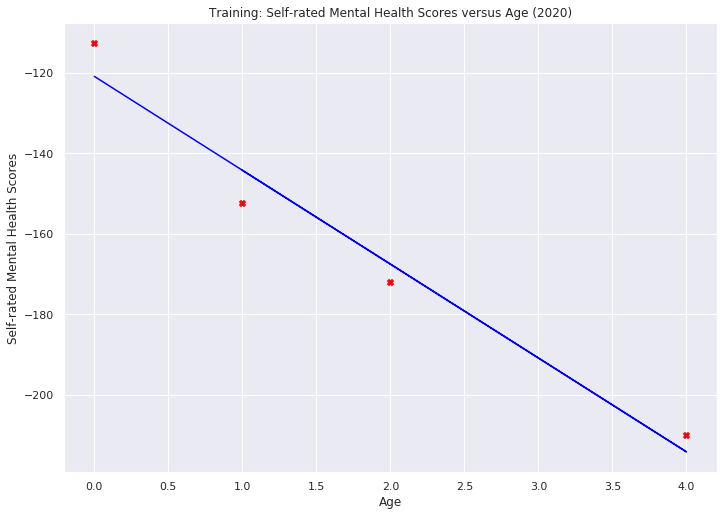

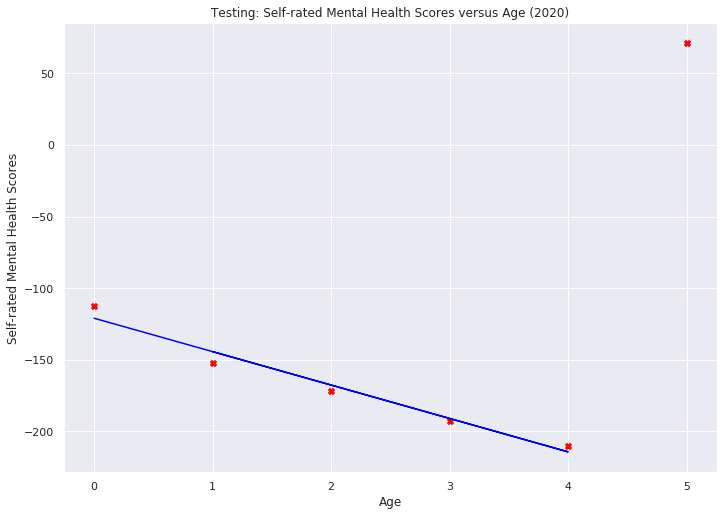

Coefficient :  [-23.32]
Intercept :  -120.94000000000001
Mean Squared Error (MSE)  :   42.47100000000009


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.966
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     56.02
Date:                Sat, 08 Apr 2023   Prob (F-statistic):             0.0174
Time:                        16:46:01   Log-Likelihood:                -13.173
No. Observations:                   4   AIC:                             30.35
Df Residuals:                       2   BIC:                             29.12
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -120.9400      7.139    -16.941      0.003    -151.657     -90.223
x1           -23.3200      3.116     -7.485      0.017     -36.726      -9.914
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   2.268
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.474
Skew:                           0.026   Prob(JB):                        0.789
Kurtosis:                       1.315   Cond. No.                         3.97
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [108]:
# 2020
x_train = np.array([0, 2, 4, 1]).reshape((-1, 1))
y_train = np.array([dfScore2020["ResultScores"][0], 
                   dfScore2020["ResultScores"][2], 
                   dfScore2020["ResultScores"][4], 
                   dfScore2020["ResultScores"][1]])

x_test = np.array([0, 1, 2, 3, 4, 5]).reshape((-1, 1))
y_test = np.array(dfScore2020["ResultScores"])

lr = LinearRegression()
lr.fit(x_train, y_train)

# Predicting Y from linear regression model
y_pred = lr.predict(x_train)

# Plotting graph (Training)
plt.scatter(x_train, y_train, color="red", marker="X")
plt.plot(x_train, y_pred, color="blue")
plt.title("Training: Self-rated Mental Health Scores versus Age (2020)")
plt.xlabel("Age")
plt.ylabel("Self-rated Mental Health Scores")
plt.show()

# Plotting graph (Testing)
plt.scatter(x_test, y_test, color="red", marker="X")
plt.plot(x_train, y_pred, color="blue")
plt.title("Testing: Self-rated Mental Health Scores versus Age (2020)")
plt.xlabel("Age")
plt.ylabel("Self-rated Mental Health Scores")
plt.show()


# Assigning Coefficient (gradient) to b
b = lr.coef_
print("Coefficient : ", b)

# Assigning y-intercept to a
a = lr.intercept_
print("Intercept : ", a)

# Mean Squared Error (MSE)
from sklearn import metrics
print('Mean Squared Error (MSE)  :  ', metrics.mean_squared_error(y_train, y_pred))

import statsmodels.api as sm
# Ordinary Least-Squares (OLS) estimator is called 
# to get regression summary
x_stat = sm.add_constant(x_train)
regsummary = sm.OLS(y_train, x_stat).fit()
regsummary.summary()
# print("Adjusted R-Square : ", regsummary.rsquared_adj)
# print("R-Square : ", regsummary.rsquared)

### We have now obtained the OLS regression results